Importing:

In [1]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [3]:
%run "../DL_notebooks/src/dataloading.ipynb"
%run "../DL_notebooks/src/training.ipynb"
%run "../DL_notebooks/src/evaluate.ipynb"
%run "../DL_notebooks/src/visualizations.ipynb"
%run "../DL_notebooks/model_architectures.ipynb"

Data loaded and split into training, validation and testing datasets


Training:

In [4]:
def update_current_model(json_file, new_model_name):
    # Load the JSON data from the file
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Update the current-model value
    data['current-model'] = new_model_name

    # Save the updated JSON data back to the file
    with open(json_file, 'w') as file:
        json.dump(data, file, indent=4)
json_file_path = '../DL_notebooks/configs/model_configs.json'
new_model_name = 'AlexNet'
update_current_model(json_file_path, new_model_name)

In [5]:
model_config_file = open('../DL_notebooks/configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'AlexNet':
        model = MRI_AlexNet
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])


In [6]:
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   5%|▌         | 1/20 [00:06<02:07,  6.72s/epoch]

Epoch [1/20] Train Loss: 1.3554 Train Accuracy: 30.43% Validation Loss: 1.3544 Validation Accuracy: 29.56%


Training:  10%|█         | 2/20 [00:12<01:47,  5.96s/epoch]

Epoch [2/20] Train Loss: 1.2918 Train Accuracy: 36.83% Validation Loss: 1.2290 Validation Accuracy: 42.33%


Training:  15%|█▌        | 3/20 [00:16<01:27,  5.14s/epoch]

Epoch [3/20] Train Loss: 1.1440 Train Accuracy: 44.80% Validation Loss: 1.1234 Validation Accuracy: 46.85%


Training:  20%|██        | 4/20 [00:20<01:16,  4.79s/epoch]

Epoch [4/20] Train Loss: 1.0919 Train Accuracy: 50.73% Validation Loss: 1.1404 Validation Accuracy: 47.98%


Training:  25%|██▌       | 5/20 [00:24<01:09,  4.64s/epoch]

Epoch [5/20] Train Loss: 1.0087 Train Accuracy: 55.95% Validation Loss: 1.1218 Validation Accuracy: 49.43%


Training:  30%|███       | 6/20 [00:29<01:03,  4.55s/epoch]

Epoch [6/20] Train Loss: 0.9243 Train Accuracy: 61.66% Validation Loss: 0.9386 Validation Accuracy: 60.26%


Training:  35%|███▌      | 7/20 [00:33<00:58,  4.51s/epoch]

Epoch [7/20] Train Loss: 0.7801 Train Accuracy: 67.64% Validation Loss: 0.7584 Validation Accuracy: 70.11%


Training:  40%|████      | 8/20 [00:38<00:54,  4.52s/epoch]

Epoch [8/20] Train Loss: 0.6555 Train Accuracy: 74.31% Validation Loss: 0.6873 Validation Accuracy: 72.05%


Training:  45%|████▌     | 9/20 [00:42<00:49,  4.46s/epoch]

Epoch [9/20] Train Loss: 0.6402 Train Accuracy: 74.37% Validation Loss: 0.6464 Validation Accuracy: 72.86%


Training:  50%|█████     | 10/20 [00:46<00:44,  4.42s/epoch]

Epoch [10/20] Train Loss: 0.5981 Train Accuracy: 78.73% Validation Loss: 0.6000 Validation Accuracy: 76.74%


Training:  55%|█████▌    | 11/20 [00:51<00:39,  4.36s/epoch]

Epoch [11/20] Train Loss: 0.5054 Train Accuracy: 80.61% Validation Loss: 0.5993 Validation Accuracy: 78.03%


Training:  60%|██████    | 12/20 [00:55<00:34,  4.34s/epoch]

Epoch [12/20] Train Loss: 0.4113 Train Accuracy: 84.22% Validation Loss: 0.6034 Validation Accuracy: 76.74%


Training:  65%|██████▌   | 13/20 [00:59<00:30,  4.32s/epoch]

Epoch [13/20] Train Loss: 0.4098 Train Accuracy: 84.11% Validation Loss: 0.4669 Validation Accuracy: 83.68%


Training:  70%|███████   | 14/20 [01:04<00:25,  4.31s/epoch]

Epoch [14/20] Train Loss: 0.3090 Train Accuracy: 87.56% Validation Loss: 0.4480 Validation Accuracy: 83.68%


Training:  75%|███████▌  | 15/20 [01:08<00:21,  4.37s/epoch]

Epoch [15/20] Train Loss: 0.2372 Train Accuracy: 90.95% Validation Loss: 0.4815 Validation Accuracy: 82.88%


Training:  80%|████████  | 16/20 [01:12<00:17,  4.34s/epoch]

Epoch [16/20] Train Loss: 0.2191 Train Accuracy: 91.22% Validation Loss: 0.4030 Validation Accuracy: 86.11%


Training:  85%|████████▌ | 17/20 [01:17<00:13,  4.34s/epoch]

Epoch [17/20] Train Loss: 0.1465 Train Accuracy: 94.45% Validation Loss: 0.4517 Validation Accuracy: 86.75%


Training:  90%|█████████ | 18/20 [01:21<00:08,  4.30s/epoch]

Epoch [18/20] Train Loss: 0.1435 Train Accuracy: 94.72% Validation Loss: 0.5409 Validation Accuracy: 82.88%


Training:  95%|█████████▌| 19/20 [01:25<00:04,  4.30s/epoch]

Epoch [19/20] Train Loss: 0.1178 Train Accuracy: 95.42% Validation Loss: 0.4318 Validation Accuracy: 87.08%


Training: 100%|██████████| 20/20 [01:29<00:00,  4.49s/epoch]

Epoch [20/20] Train Loss: 0.1365 Train Accuracy: 94.51% Validation Loss: 0.4384 Validation Accuracy: 86.91%


In [7]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:   5%|▌         | 1/20 [00:00<00:13,  1.41epoch/s]

Testing Epoch [1/20] Test Loss: 0.3649 Test Accuracy: 87.90% Time per Epoch: 0.71 seconds


Testing:  10%|█         | 2/20 [00:01<00:12,  1.45epoch/s]

Testing Epoch [2/20] Test Loss: 0.3474 Test Accuracy: 87.90% Time per Epoch: 0.68 seconds


Testing:  15%|█▌        | 3/20 [00:02<00:11,  1.44epoch/s]

Testing Epoch [3/20] Test Loss: 0.3423 Test Accuracy: 87.90% Time per Epoch: 0.70 seconds


Testing:  20%|██        | 4/20 [00:02<00:11,  1.42epoch/s]

Testing Epoch [4/20] Test Loss: 0.3468 Test Accuracy: 87.90% Time per Epoch: 0.71 seconds


Testing:  25%|██▌       | 5/20 [00:03<00:10,  1.38epoch/s]

Testing Epoch [5/20] Test Loss: 0.3506 Test Accuracy: 87.90% Time per Epoch: 0.76 seconds


Testing:  30%|███       | 6/20 [00:04<00:10,  1.34epoch/s]

Testing Epoch [6/20] Test Loss: 0.3377 Test Accuracy: 87.90% Time per Epoch: 0.78 seconds


Testing:  35%|███▌      | 7/20 [00:05<00:10,  1.29epoch/s]

Testing Epoch [7/20] Test Loss: 0.3436 Test Accuracy: 87.90% Time per Epoch: 0.83 seconds


Testing:  40%|████      | 8/20 [00:05<00:09,  1.28epoch/s]

Testing Epoch [8/20] Test Loss: 0.3573 Test Accuracy: 87.90% Time per Epoch: 0.80 seconds


Testing:  45%|████▌     | 9/20 [00:06<00:08,  1.25epoch/s]

Testing Epoch [9/20] Test Loss: 0.3496 Test Accuracy: 87.90% Time per Epoch: 0.83 seconds


Testing:  50%|█████     | 10/20 [00:07<00:07,  1.26epoch/s]

Testing Epoch [10/20] Test Loss: 0.3525 Test Accuracy: 87.90% Time per Epoch: 0.78 seconds


Testing:  55%|█████▌    | 11/20 [00:08<00:07,  1.27epoch/s]

Testing Epoch [11/20] Test Loss: 0.3443 Test Accuracy: 87.90% Time per Epoch: 0.76 seconds


Testing:  60%|██████    | 12/20 [00:09<00:06,  1.28epoch/s]

Testing Epoch [12/20] Test Loss: 0.3484 Test Accuracy: 87.90% Time per Epoch: 0.76 seconds


Testing:  65%|██████▌   | 13/20 [00:09<00:05,  1.29epoch/s]

Testing Epoch [13/20] Test Loss: 0.3531 Test Accuracy: 87.90% Time per Epoch: 0.77 seconds


Testing:  70%|███████   | 14/20 [00:10<00:04,  1.29epoch/s]

Testing Epoch [14/20] Test Loss: 0.3483 Test Accuracy: 87.90% Time per Epoch: 0.76 seconds


Testing:  75%|███████▌  | 15/20 [00:11<00:03,  1.29epoch/s]

Testing Epoch [15/20] Test Loss: 0.3458 Test Accuracy: 87.90% Time per Epoch: 0.78 seconds


Testing:  80%|████████  | 16/20 [00:12<00:03,  1.28epoch/s]

Testing Epoch [16/20] Test Loss: 0.3399 Test Accuracy: 87.90% Time per Epoch: 0.79 seconds


Testing:  85%|████████▌ | 17/20 [00:13<00:02,  1.27epoch/s]

Testing Epoch [17/20] Test Loss: 0.3372 Test Accuracy: 87.90% Time per Epoch: 0.79 seconds


Testing:  90%|█████████ | 18/20 [00:13<00:01,  1.26epoch/s]

Testing Epoch [18/20] Test Loss: 0.3497 Test Accuracy: 87.90% Time per Epoch: 0.81 seconds


Testing:  95%|█████████▌| 19/20 [00:14<00:00,  1.27epoch/s]

Testing Epoch [19/20] Test Loss: 0.3428 Test Accuracy: 87.90% Time per Epoch: 0.78 seconds


Testing: 100%|██████████| 20/20 [00:15<00:00,  1.30epoch/s]

Testing Epoch [20/20] Test Loss: 0.3386 Test Accuracy: 87.90% Time per Epoch: 0.78 seconds
Average Test Loss: 0.3470
Average Test Accuracy: 87.90%


Training Classification:

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       546
           1       0.93      0.92      0.93       560
           2       0.95      0.97      0.96       254
           3       0.97      0.98      0.98       497

    accuracy                           0.95      1857
   macro avg       0.95      0.95      0.95      1857
weighted avg       0.94      0.95      0.94      1857

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       169
           1       0.82      0.86      0.84       175
           2       0.85      0.94      0.89        97
           3       0.95      0.90      0.93       178

    accuracy                           0.87       619
   macro avg       0.87      0.88      0.87       619
weighted avg       0.87      0.87      0.87       619

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       186
           1       0.

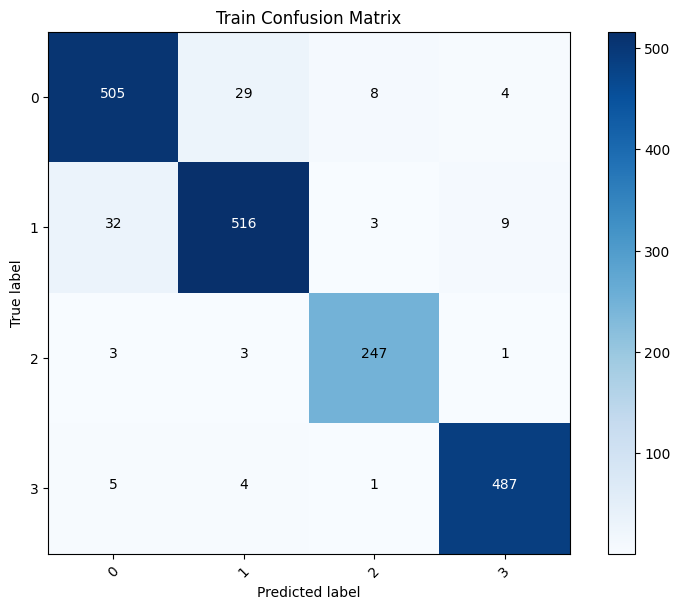

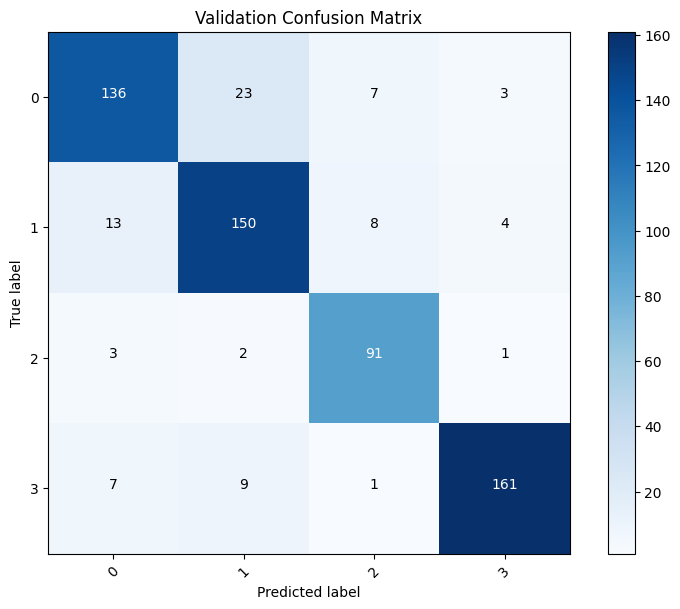

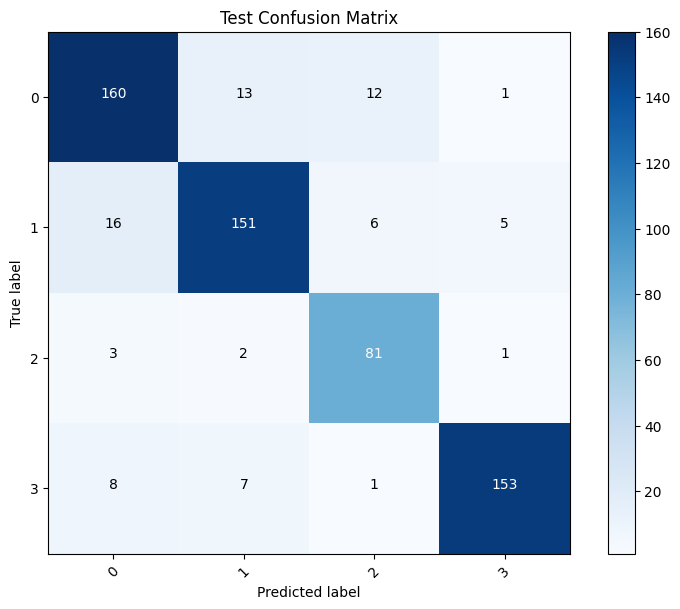

In [8]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)] 
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()